#### importing the relevant packages and loading the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

X = pd.read_csv("dengue_features_train.csv")
y = pd.read_csv("dengue_labels_train.csv")
test = pd.read_csv("dengue_features_test.csv")

### Train Test Split
We shall split our dataset based on time stamps as we are required to make predictions for the future.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Since the dates are different for the two cities, we need to do two different splits and then merge them

In [3]:
y_sj = y[y['city'] == 'sj']['total_cases']
y_iq = y[y['city'] == 'iq']['total_cases']

X_sj = X[X['city'] == 'sj'].drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1)
X_iq = X[X['city'] == 'iq'].drop(['city', 'year', 'weekofyear', 'week_start_date'], axis=1)

X_sj_train, X_sj_test, Y_sj_train, Y_sj_test = train_test_split(X_sj, y_sj, shuffle = False)
X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split(X_iq, y_iq, shuffle = False)

In [4]:
# Concatenating the data again after splitting it

X_train = pd.concat([X_sj_train, X_iq_train])
Y_train = pd.concat([Y_sj_train, Y_iq_train])
X_test = pd.concat([X_sj_test, Y_iq_test])
Y_test = pd.concat([Y_sj_test, Y_iq_test])

X = pd.concat([X_train, X_test])
y = pd.concat([Y_train, Y_test])

In [5]:
# This is a temporary fix to a larger problem, figure out the root of this '0' column
X.drop(0, axis =1, inplace=True)

# Dropping the rows with null values for now
X.dropna(inplace=True)
# Selecting y values corresponding to the filtered X values
y = y.loc[X.index]

In [6]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, shuffle = False)

#### Baseline Model

In [8]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error

def mape(Y_test, Y_pred, epsilon = 1):
    return np.mean(np.abs((Y_test - Y_pred + epsilon) / (Y_test + epsilon))) * 100

In [10]:
mean_absolute_error(Y_test, Y_pred)

18.08817950330049

In [11]:
# MAPE, with +1 smoothening
mape(Y_test, Y_pred)

224.296349335149

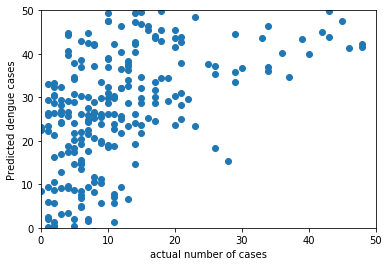

In [12]:
plt.scatter(Y_test, Y_pred)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel("actual number of cases")
plt.ylabel("Predicted dengue cases")
plt.show()

#### L1

In [14]:
from sklearn import linear_model

In [15]:
clf = linear_model.Lasso(alpha=12)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
mean_absolute_error(Y_test, Y_pred)

18.67972812854064

In [16]:
mape(Y_test, Y_pred, 21)

25.90408028285436

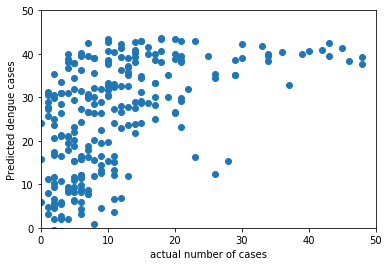

In [19]:
plt.scatter(Y_test, Y_pred)
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.xlabel("actual number of cases")
plt.ylabel("Predicted dengue cases")
plt.show()

#### L2

In [17]:
clf = linear_model.Ridge(alpha = 400)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
mean_absolute_error(Y_test, Y_pred)

17.877858594392382

In [18]:
mape(Y_test, Y_pred, 10)

58.38990806288828